# Tensorflow basic: Raw TF and Estimators

In [1]:
import tensorflow as tf

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("MNIST_DATA/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_DATA/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_DATA/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting MNIST_DATA/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [14]:
mnist.train.images[1].shape

(784,)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

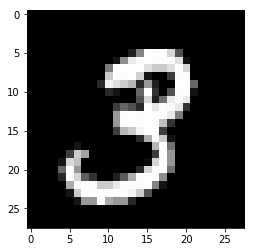

In [16]:
plt.imshow(mnist.train.images[1].reshape(28,28),cmap='gist_gray')

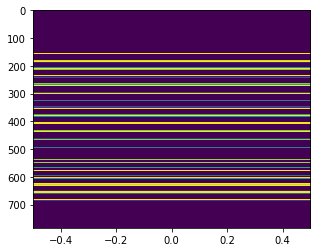

In [20]:
plt.imshow(mnist.train.images[1].reshape(784,1),aspect=0.001) # vector reshaping.

In [21]:
x = tf.placeholder(tf.float32,shape=([None,784])) #filled in at a later stage

In [22]:
# mutable variables that will be available for to the optimizer
W=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))

In [23]:
y= tf.matmul(x,W)+b

In [24]:
y_true = tf.placeholder(tf.float32,shape=[None,10])

In [26]:
mnist.train.labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [27]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y))

In [28]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [29]:
train = optimizer.minimize(cross_entropy)

In [30]:
init = tf.global_variables_initializer()

In [35]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        batch_x,batch_y = mnist.train.next_batch(100)
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
    
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1)) # the 1 is an axis
    
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print(sess.run(acc,feed_dict={x:mnist.test.images, y_true:mnist.test.labels}))
    

0.9105


### Tensorflow Estimators

In [37]:
import pandas as pd
df = pd.read_csv("iris.csv")

In [38]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [40]:
import re

In [66]:

df.columns =[re.sub("[\s\()]","_",x) for x in df.columns]

In [67]:
df.columns

Index(['sepal_length__cm_', 'sepal_width__cm_', 'petal_length__cm_',
       'petal_width__cm_', 'target'],
      dtype='object')

In [68]:
df['target']=df['target'].apply(int)

In [69]:
df

,sepal_length__cm_,sepal_width__cm_,petal_length__cm_,petal_width__cm_,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [70]:
y= df['target']
X=df.drop('target',axis=1)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [73]:
X_train.describe()

,sepal_length__cm_,sepal_width__cm_,petal_length__cm_,petal_width__cm_
count,105.000000,105.000000,105.00000,105.000000
mean,5.882857,3.031429,3.88381,1.250476
std,0.833950,0.407222,1.74511,0.769756
min,4.400000,2.000000,1.00000,0.100000
25%,5.100000,2.800000,1.60000,0.300000
50%,5.800000,3.000000,4.50000,1.400000
75%,6.500000,3.300000,5.10000,1.900000
max,7.700000,4.200000,6.90000,2.500000


In [74]:
## Get the features in a format that can be used as input to algorithms. This is similar to the MlLib VectorAssembler class
## that is used as input to estimators
feats = []
for col in X.columns:
    feats.append(tf.feature_column.numeric_column(col))

In [75]:
feats

[_NumericColumn(key='sepal_length__cm_', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='sepal_width__cm_', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='petal_length__cm_', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='petal_width__cm_', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [76]:
## Note that the inputs is more than putting it into a structure. It also performs the batching. This is not the case with MLLib 
## VectorAssembler.
tf_input=tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10,num_epochs=5, shuffle=True)

In [77]:
## create the estimator instance.

In [80]:
# The DNNClassifier uses the RELU by default
classifier= tf.estimator.DNNClassifier(hidden_units=[10,20,10],n_classes=3,feature_columns=feats)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\mattma\\AppData\\Local\\Temp\\tmpha_fj0g8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000000002D957198>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Now train it

In [81]:
## Again, invoking train on the model trains it.
classifier.train(input_fn=tf_input,steps=50)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\mattma\AppData\Local\Temp\tmpha_fj0g8\model.ckpt.
INFO:tensorflow:loss = 12.701054, step = 1
INFO:tensorflow:Saving checkpoints for 50 into C:\Users\mattma\AppData\Local\Temp\tmpha_fj0g8\model.ckpt.
INFO:tensorflow:Loss for final step: 1.7253693.


In [82]:
pred_fn=tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

In [83]:
predictions = list(classifier.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\mattma\AppData\Local\Temp\tmpha_fj0g8\model.ckpt-50
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [94]:
predictions[0]['class_ids'][0]

0

In [95]:
#pull out just the the predicted classes
final_preds = []
for pred in predictions:
    final_preds.append(pred['class_ids'][0])

In [96]:
from sklearn.metrics import confusion_matrix, classification_report

In [97]:
print(confusion_matrix(y_test,final_preds))

[[18  0  0]
 [ 0 13  2]
 [ 0  0 12]]


In [98]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.87      0.93        15
           2       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

